In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os, random, time, MirandaAttributes, sys
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import backend as K
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split, KFold

In [2]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [20]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))
#Old dataset
#train_dataset_url = "https://raw.githubusercontent.com/intentodemusico/Stegonomono/master/ANN/Dataset/train_70000.csv"
#test_dataset_url = "https://raw.githubusercontent.com/intentodemusico/Stegonomono/master/ANN/Dataset/test_70000.csv"

#New dataset
train_dataset_url = "https://raw.githubusercontent.com/intentodemusico/Stegonomono/master/ANN/NewDataset/Final/train_5000.csv"
test_dataset_url = "https://raw.githubusercontent.com/intentodemusico/Stegonomono/master/ANN/NewDataset/Final/test_5000.csv"

TensorFlow version: 2.3.0
Eager execution: True


In [4]:
isStego=lambda x:1 if x[:6]=="stego_" else 0
getYFromImageList=lambda x: [isStego(element) for element in x]

In [5]:
folder="../../../Dataset/Mono/MonoSamples/WOW_5" 
images=os.listdir(folder)
random.shuffle(images)
images=images[:6000]
print(len(images))

6000


In [47]:
#%% Importing the dataset
labels=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Geometric_Mean', 'Mobility', 'Complexity','IsStego','Location']
trainDataset = pd.read_csv(train_dataset_url,header=None,names=labels)
X_Train = trainDataset.iloc[:, :-2].values
Y_Train = trainDataset.iloc[:, -2].values

testDataset = pd.read_csv(test_dataset_url,header=None,names=labels)
X_Test = testDataset.iloc[:, :-2].values
Y_Test = testDataset.iloc[:, -2].values

In [48]:
X_Test[817]

array([3.12107051e+01, 5.26674128e+00, 8.05804400e+02, 6.58600000e+03,
       2.25000000e+01, 3.70669500e+01, 9.36724400e-01, 2.08423470e+00])

In [54]:
x[2]

array([3.29945302e+00, 2.06689262e+00, 9.26487427e+01, 3.92000000e+02,
       2.65000000e+01, 2.99362545e+01, 1.26486778e-01, 1.04022913e+01],
      dtype=float64)

In [27]:
MirandaAttributes.attributes( mpimg.imread( os.path.abspath(os.path.join(folder, images[1])) ) ,windowSize)

array([4.17796680e+01, 5.59556484e+00, 1.13247513e+02, 1.19100000e+03,
       4.70000000e+01, 3.19640179e+01, 3.30172122e-01, 2.68447447e+00],
      dtype=float64)

In [53]:
y[0]

1

In [112]:
pd.DataFrame(y).describe()

,0
count,6000.000000
mean,0.508000
std,0.499978
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [114]:
pd.DataFrame(y).value_counts()

1    3048
0    2952
dtype: int64

In [66]:

y=getYFromImageList(images)
windowSize=128
t = time.time()

x=pd.DataFrame(([ MirandaAttributes.attributes( mpimg.imread( os.path.abspath(os.path.join(folder, images[i])) ) ,windowSize)  for i in range(len(images))] ),columns=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Geometric_Mean', 'Mobility', 'Complexity'])
elapsed = time.time() - t
print(elapsed)

9.473108053207397


In [79]:
pd.DataFrame(sc.fit_transform(trainDataset.iloc[:, :-2])).describe() #Dataset Miranda

,0,1,2,3,4,5,6,7
count,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
mean,-4.229256e-17,-5.799874e-17,1.835754e-16,3.322342e-17,9.409140e-17,6.661338e-19,1.034728e-16,-2.158274e-16
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-5.230433e-01,-1.326607e+00,-1.082958e+00,-6.275773e-01,-2.044531e+00,-2.074518e+00,-1.270998e+00,-1.084507e+00
25%,-4.609177e-01,-6.081873e-01,-5.691417e-01,-4.619362e-01,-7.492067e-01,-7.890094e-01,-8.875347e-01,-7.227772e-01
50%,-3.714119e-01,-3.169261e-01,-2.858470e-01,-3.056304e-01,1.097251e-01,5.970005e-02,-2.509995e-01,-3.190684e-01
75%,-9.420250e-02,1.835976e-01,1.973144e-01,-1.180893e-02,7.677776e-01,8.077413e-01,8.752547e-01,4.329381e-01
max,5.101185e+00,4.184234e+00,8.957463e+00,1.055152e+01,2.686520e+00,2.100641e+00,3.224357e+00,4.515896e+00


In [81]:
pd.DataFrame(sc.fit_transform(x)).describe()                        #Dataset García

,0,1,2,3,4,5,6,7
count,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03
mean,4.043062e-18,-1.487699e-17,-7.061018e-17,-8.148112e-17,1.968795e-17,1.051474e-17,4.015307e-17,1.077286e-16
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00
min,-4.663350e-01,-1.231467e+00,-9.218287e-01,-4.841423e-01,-1.566358e+00,-1.237329e-01,-8.558879e-01,-1.774645e+00
25%,-4.261091e-01,-5.908134e-01,-5.028086e-01,-3.882524e-01,-8.667610e-01,-5.489817e-02,-5.559190e-01,-8.212379e-01
50%,-3.617398e-01,-3.196927e-01,-2.774613e-01,-2.949195e-01,2.582882e-02,-2.803442e-02,-3.858309e-01,3.929988e-02
75%,-1.513204e-01,1.458300e-01,1.070399e-01,-7.245486e-02,8.219224e-01,-3.995053e-03,7.711347e-02,8.124633e-01
max,4.688304e+00,3.979196e+00,9.187752e+00,9.926309e+00,2.389986e+00,4.450621e+01,5.590589e+00,2.689814e+00


In [82]:
x

,Kurtosis,Skewness,Std,Range,Median,Geometric_Mean,Mobility,Complexity
0,1.648618,1.367628,41.337315,204.0,54.0,52.600048,0.207141,7.654920
1,41.779668,5.595565,113.247513,1191.0,47.0,31.964018,0.330172,2.684474
2,3.299453,2.066893,92.648743,392.0,26.5,29.936255,0.126487,10.402291
3,10.504385,3.369508,158.663162,806.0,12.0,15.569080,0.122660,7.182946
4,4.632010,2.040607,63.220039,400.0,42.0,42.922394,0.226142,6.890124
...,...,...,...,...,...,...,...,...
5995,248.371432,15.783938,458.211090,7361.0,36.0,26.513327,0.939840,1.035885
5996,0.253993,1.206094,73.782936,275.0,26.0,33.986099,0.125481,12.852524
5997,-0.690734,0.763230,61.666504,213.0,38.0,34.628922,0.120367,13.919621
5998,-0.260815,1.087519,88.338707,296.0,5.0,37.161453,0.127670,12.196375


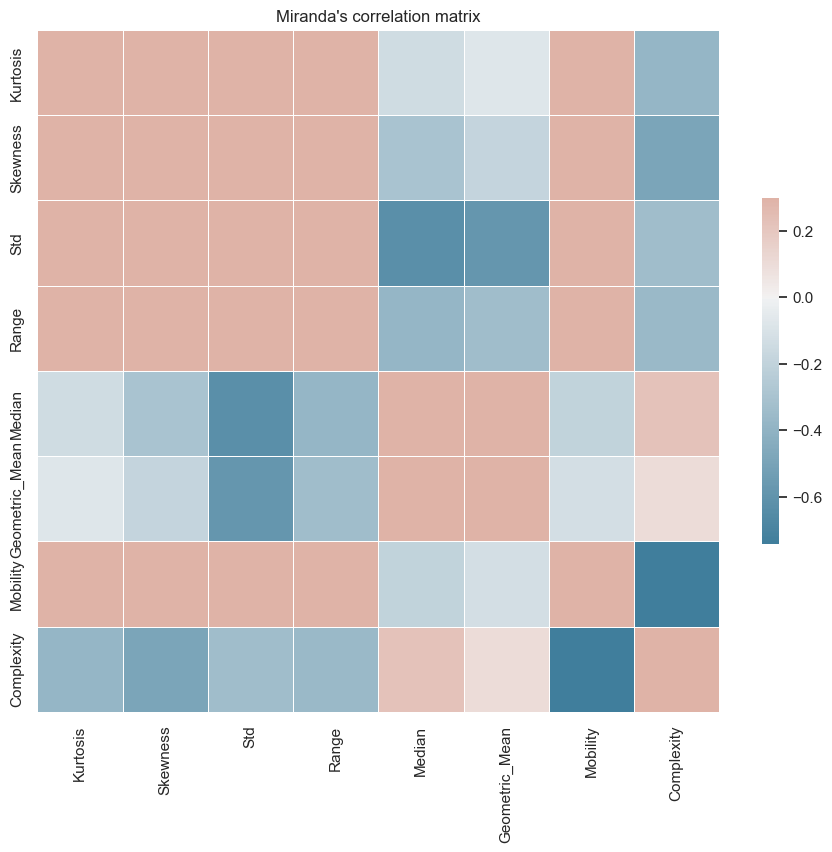

In [109]:
sns.set_theme(style="dark")
corr = trainDataset.iloc[:, :-2].corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.tick_params(axis='x', rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Miranda's correlation matrix")
plt.show()

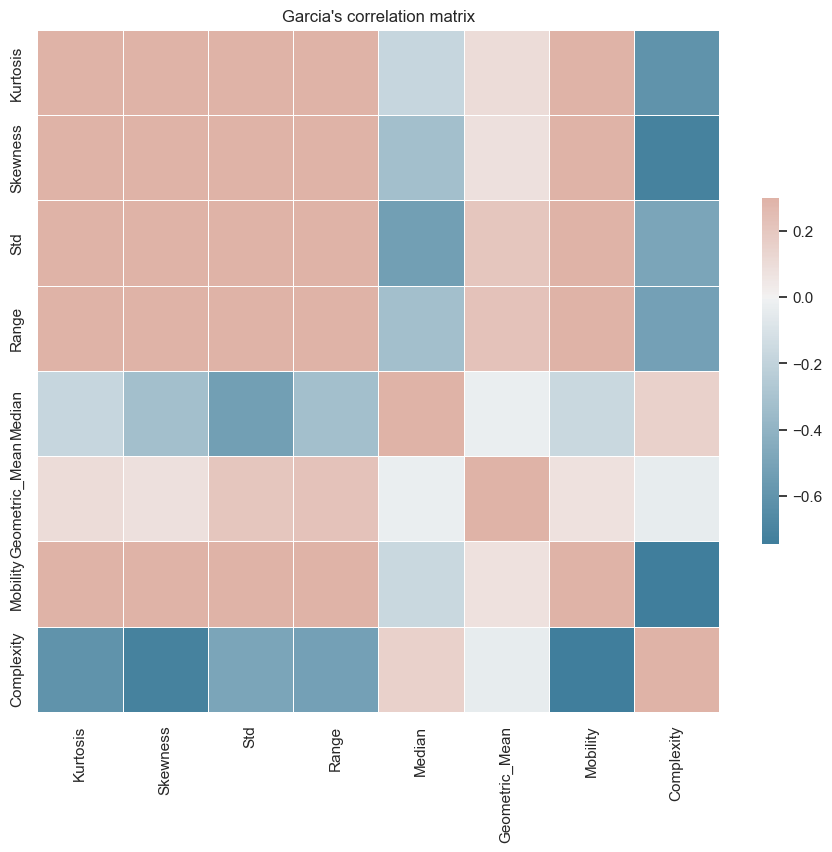

In [111]:
import seaborn as sns
sns.set_theme(style="dark")
corr = x.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.tick_params(axis='x', rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Garcia's correlation matrix")
plt.show()

In [7]:
kf = KFold(n_splits=5, shuffle=False)
acc_per_fold = []
loss_per_fold = []

#%% Feature Scaling
from sklearn.model_selection import train_test_split
X_train, X_test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.20, random_state=42)
from sklearn.preprocessing import StandardScaler
sc.fit_transform(


In [58]:
sc = StandardScaler()
x = sc.fit_transform(x)


In [56]:
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

In [59]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation=tf.nn.relu, input_shape=(8,)),  # input shape required
  tf.keras.layers.Dense(4, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(x, y, batch_size = 64, epochs = 250)

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})

------------------------------------------------------------------------
Training for fold 0 ...
Epoch 1/250
75/75 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5050 - f1_m: 0.5832 - precision_m: 0.4412 - recall_m: 0.8667 - val_loss: 0.6932 - val_accuracy: 0.4967 - val_f1_m: 0.6608 - val_precision_m: 0.4973 - val_recall_m: 1.0000
Epoch 2/250
75/75 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5108 - f1_m: 0.6738 - precision_m: 0.5108 - recall_m: 1.0000 - val_loss: 0.6932 - val_accuracy: 0.4967 - val_f1_m: 0.6608 - val_precision_m: 0.4973 - val_recall_m: 1.0000
Epoch 3/250
75/75 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5108 - f1_m: 0.6742 - precision_m: 0.5108 - recall_m: 1.0000 - val_loss: 0.6933 - val_accuracy: 0.4967 - val_f1_m: 0.6608 - val_precision_m: 0.4973 - val_recall_m: 1.0000
Epoch 4/250
75/75 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5108 - f1_m: 0

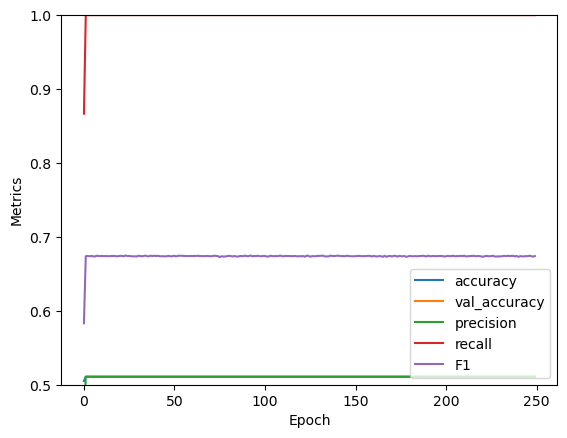

Next fold
Score for fold 0: loss of 0.6935499906539917; accuracy of 49.666666984558105%
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/250
75/75 [==============================] - 0s 5ms/step - loss: 1.2715 - accuracy: 0.4881 - f1_m: 0.2087 - precision_m: 0.4758 - recall_m: 0.1483 - val_loss: 0.7575 - val_accuracy: 0.5150 - val_f1_m: 0.0893 - val_precision_m: 0.4886 - val_recall_m: 0.0503
Epoch 2/250
75/75 [==============================] - 0s 2ms/step - loss: 0.7257 - accuracy: 0.4910 - f1_m: 0.0599 - precision_m: 0.4596 - recall_m: 0.0327 - val_loss: 0.7107 - val_accuracy: 0.5108 - val_f1_m: 0.0458 - val_precision_m: 0.4474 - val_recall_m: 0.0245
Epoch 3/250
75/75 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.4894 - f1_m: 0.0307 - precision_m: 0.3218 - recall_m: 0.0164 - val_loss: 0.7007 - val_accuracy: 0.5083 - val_f1_m: 0.0277 - val_precision_m: 0.3246 - val_recall_m: 0.0147
Epoch 4/250
75/75 [=

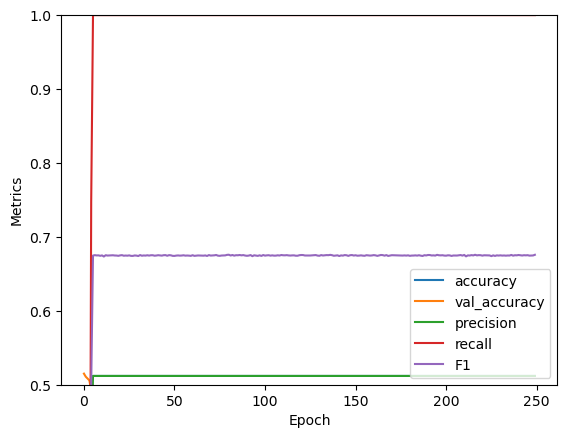

Next fold
Score for fold 1: loss of 0.6938174366950989; accuracy of 49.25000071525574%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/250
75/75 [==============================] - 0s 5ms/step - loss: 143.4222 - accuracy: 0.4975 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 89.5546 - val_accuracy: 0.4700 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/250
75/75 [==============================] - 0s 2ms/step - loss: 57.0531 - accuracy: 0.4975 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 32.4744 - val_accuracy: 0.4700 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/250
75/75 [==============================] - 0s 2ms/step - loss: 13.9801 - accuracy: 0.5021 - f1_m: 0.1960 - precision_m: 0.3056 - recall_m: 0.2049 - val_loss: 0.8269 - val_accuracy: 0.5308 - val_f1_m: 0.6743 - val_precision_

KeyboardInterrupt: 

In [9]:

fold_no=0
for train, test in kf.split(x, y):
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(8, activation=tf.nn.relu, input_shape=(8,)),  # input shape required
      tf.keras.layers.Dense(4, activation=tf.nn.relu),
      tf.keras.layers.Dense(2, activation=tf.nn.relu),
      tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])
    #%% Feature Scaling
    sc = StandardScaler()

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_m,precision_m, recall_m])
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    #Fitting
    
    #history=model.fit(sc.fit_transform(x[train]), y[train],validation_data=(sc.fit_transform(x[test]), y[test]), epochs=250,batch_size=64)
    history=model.fit(x[train], y[train],validation_data=(x[test], y[test]), epochs=250,batch_size=64)
    print("\n\n\n\n\nFitted")
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    test_loss, test_acc,f1_score, precision, recall = model.evaluate(x[test], y[test], verbose=2)
    print("Loss:",test_loss, "\nAccuracy:",test_acc,"\nF1 score:",f1_score, "\nPrecision:",precision, "\nRecall",recall)
        
    plt.plot(history.history['precision_m'], label='precision')
    plt.plot(history.history['recall_m'], label = 'recall')
    plt.plot(history.history['f1_m'], label = 'F1')
    plt.xlabel('Epoch')
    plt.ylabel('Metrics')
    plt.legend(loc='lower right')
    plt.show()
    print("Next fold")
    #dataMqtt={"Fold":str(fold_no),"timestamp":str(datetime.now()),"Loss":str(test_loss), "Acc":str(test_acc),"F1":str(f1_score),"Precision":str( precision),"Recall": str(recal)}
    #dataMqtt_out=json.dumps(data)
    #retMqtt= client1.publish("stegian/data",dataMqtt_out)
    
    # Generate generalization metrics
    scores = model.evaluate(x[test], y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    # Increase fold number
    fold_no += 1

In [ ]:
print(model)
model.evaluate(X_Train, Y_Train)
print(model.metrics_names)
#%% Predicting the Test set results

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = (model.predict(X_Test) > 0.5)
#%% Making the Confusion Matrix
cm = metrics.confusion_matrix(Y_Test, y_pred)
print("Confusion matrix\n",cm)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity :', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity :', specificity)
#%% 
print("Precision",metrics.precision_score(Y_Test, y_pred, average=None))
print("Accuracy",metrics.accuracy_score(Y_Test, y_pred))
print("F1",metrics.f1_score(Y_Test, y_pred, average=None))

In [ ]:
import numpy as np


In [ ]:
fallas=np.array(labels,dtype='<U256')
y_pred=y_pred.reshape(len(y_pred))
print(np.shape(y_pred))
print(np.shape(Y_Test))
for i in range(len(y_pred)):
    if(y_pred[i]!=Y_Test[i]>0.5):
        fallas=np.vstack((fallas,testDataset.iloc[i].to_numpy()))

y_pred = (model.predict(X_Train) > 0.5).reshape(len(X_Train))
for i in range(len(y_pred)):
    if(y_pred[i]!=Y_Train[i]>0.5):
        fallas=np.vstack((fallas,trainDataset.iloc[i].to_numpy()))

asd="fallasEval.csv"
print("Fallas",len(fallas))
np.savetxt(asd,fallas,delimiter=",", fmt="%s")

In [ ]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
